In [60]:
import pandas as pd 

In [61]:
rename_dict = {
    "일시": "날짜",
    "평균기온(°C)": "평균 기온",
    "최저기온(°C)": "최저 기온",
    "최고기온(°C)": "최고 기온",
    "일강수량(mm)": "강수량",
    "평균 풍속(m/s)": "풍속",
    "평균 상대습도(%)": "습도",
    "일 최심적설(cm)": "적설량"
}

In [62]:
df = pd.read_csv("./weather_csv/weather_raw_data.csv", encoding="cp949").rename(columns=rename_dict)

In [63]:
# 날짜 및 수치형 처리
df["날짜"] = pd.to_datetime(df["날짜"], errors="coerce")
for col in ["평균 기온", "최저 기온", "최고 기온", "강수량", "풍속", "습도", "적설량"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [64]:
# 결측치 처리
df["강수량"] = df['강수량'].fillna(0)
df['적설량'] = df['적설량'].fillna(0)

In [65]:
# 파생변수 생성
df["기온 범위"] = df["최고 기온"] - df["최저 기온"]
df["습도 대비 강수량"] = df["강수량"] / (df["습도"] + 1)  # 0으로 나누는 것 방지
df["불쾌지수"] = df["풍속"] * df["습도"]
df["건조지수"] = df["풍속"] / (df["습도"] + 1)  # 0으로 나누는 것 방지


In [66]:
df.head()

,지점,지점명,날짜,평균 기온,최저 기온,최고 기온,강수량,풍속,습도,적설량,기온 범위,습도 대비 강수량,불쾌지수,건조지수
0,90,속초,2020-01-01,0.8,-3.4,4.8,0.0,2.4,36.1,0.0,8.2,0.0,86.64,0.064690
1,90,속초,2020-01-02,2.8,-2.1,6.6,0.0,2.3,38.6,0.0,8.7,0.0,88.78,0.058081
2,90,속초,2020-01-03,4.7,0.8,8.5,0.0,2.2,28.9,0.0,7.7,0.0,63.58,0.073579
3,90,속초,2020-01-04,4.0,1.1,8.1,0.0,2.2,30.1,0.0,7.0,0.0,66.22,0.070740
4,90,속초,2020-01-05,3.1,-0.6,8.8,0.0,1.4,43.3,0.0,9.4,0.0,60.62,0.031603


In [67]:
region_map = {
    # 강원도
    "강릉": "강원도", "대관령": "강원도", "동해": "강원도", "북강릉": "강원도",
    "북춘천": "강원도", "삼척": "강원도", "속초": "강원도", "영월": "강원도",
    "원주": "강원도", "인제": "강원도", "정선군": "강원도", "철원": "강원도",
    "춘천": "강원도", "태백": "강원도", "홍천": "강원도",

    # 경기
    "동두천": "경기", "수원": "경기", "양평": "경기", "이천": "경기", "파주": "경기",

    # 경남
    "거제": "경남", "거창": "경남", "김해시": "경남", "남해": "경남", "밀양": "경남",
    "북창원": "경남", "산청": "경남", "양산시": "경남", "의령군": "경남", "진주": "경남",
    "창원": "경남", "통영": "경남", "함양군": "경남", "합천": "경남",

    # 경북
    "경주시": "경북", "구미": "경북", "문경": "경북", "봉화": "경북", "상주": "경북",
    "안동": "경북", "영덕": "경북", "영주": "경북", "영천": "경북", "울릉도": "경북",
    "울진": "경북", "의성": "경북", "청송군": "경북", "포항": "경북",

    # 광역시 및 특별시
    "광주": "광주", "대구": "대구", "대전": "대전",
    "부산": "부산", "북부산": "부산", "서울": "서울",
    "세종": "세종", "울산": "울산", "강화": "인천", "백령도": "인천", "인천": "인천",

    # 전남
    "강진군": "전남", "고흥": "전남", "광양시": "전남", "목포": "전남", "무안": "전남",
    "보성군": "전남", "순천": "전남", "여수": "전남", "영광군": "전남", "완도": "전남",
    "장흥": "전남", "주암": "전남", "진도군": "전남", "해남": "전남", "흑산도": "전남",

    # 전북
    "고창": "전북", "고창군": "전북", "군산": "전북", "남원": "전북", "부안": "전북",
    "순창군": "전북", "임실": "전북", "장수": "전북", "전주": "전북", "정읍": "전북",

    # 제주
    "고산": "제주도", "서귀포": "제주도", "성산": "제주도", "제주": "제주도",

    # 충남
    "금산": "충남", "보령": "충남", "부여": "충남", "서산": "충남", "천안": "충남", "홍성": "충남",

    # 충북
    "보은": "충북", "서청주": "충북", "제천": "충북", "청주": "충북", "추풍령": "충북", "충주": "충북"
}


In [68]:
df["지역"] = df["지점명"].map(region_map)

In [69]:
df.head()

,지점,지점명,날짜,평균 기온,최저 기온,최고 기온,강수량,풍속,습도,적설량,기온 범위,습도 대비 강수량,불쾌지수,건조지수,지역
0,90,속초,2020-01-01,0.8,-3.4,4.8,0.0,2.4,36.1,0.0,8.2,0.0,86.64,0.064690,강원도
1,90,속초,2020-01-02,2.8,-2.1,6.6,0.0,2.3,38.6,0.0,8.7,0.0,88.78,0.058081,강원도
2,90,속초,2020-01-03,4.7,0.8,8.5,0.0,2.2,28.9,0.0,7.7,0.0,63.58,0.073579,강원도
3,90,속초,2020-01-04,4.0,1.1,8.1,0.0,2.2,30.1,0.0,7.0,0.0,66.22,0.070740,강원도
4,90,속초,2020-01-05,3.1,-0.6,8.8,0.0,1.4,43.3,0.0,9.4,0.0,60.62,0.031603,강원도


In [70]:
# 지점, 지점명 제거 및 지역 맨앞으로
df = df.drop(columns=['지점', '지점명'])
cols = ['지역'] + [col for col in df.columns if col != '지역']
df = df[cols]

In [71]:
df.head()

,지역,날짜,평균 기온,최저 기온,최고 기온,강수량,풍속,습도,적설량,기온 범위,습도 대비 강수량,불쾌지수,건조지수
0,강원도,2020-01-01,0.8,-3.4,4.8,0.0,2.4,36.1,0.0,8.2,0.0,86.64,0.064690
1,강원도,2020-01-02,2.8,-2.1,6.6,0.0,2.3,38.6,0.0,8.7,0.0,88.78,0.058081
2,강원도,2020-01-03,4.7,0.8,8.5,0.0,2.2,28.9,0.0,7.7,0.0,63.58,0.073579
3,강원도,2020-01-04,4.0,1.1,8.1,0.0,2.2,30.1,0.0,7.0,0.0,66.22,0.070740
4,강원도,2020-01-05,3.1,-0.6,8.8,0.0,1.4,43.3,0.0,9.4,0.0,60.62,0.031603


In [72]:
df.tail()

,지역,날짜,평균 기온,최저 기온,최고 기온,강수량,풍속,습도,적설량,기온 범위,습도 대비 강수량,불쾌지수,건조지수
174831,부산,2024-12-27,1.9,-2.5,6.4,0.0,1.8,41.3,0.0,8.9,0.0,74.34,0.042553
174832,부산,2024-12-28,1.3,-2.0,5.4,0.0,1.8,47.1,0.0,7.4,0.0,84.78,0.037422
174833,부산,2024-12-29,1.6,-4.8,9.6,0.0,1.2,58.3,0.0,14.4,0.0,69.96,0.020236
174834,부산,2024-12-30,6.0,-1.6,12.6,0.0,1.3,61.1,0.0,14.2,0.0,79.43,0.020934
174835,부산,2024-12-31,5.2,-3.3,9.9,0.0,1.9,33.4,0.0,13.2,0.0,63.46,0.055233


### 분류

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import platform 

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'    
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

##### 지역별 기후 클러스터링 결과
KMeans 알고리즘으로 지역 기후를 평균기온과 습도 기준으로 클러스터링한 결과
- 해석 예시
    - Cluster 0 (주황색): 평균 기온 가장 높고, 습도는 중간 수준의 지역 → 한국에서 기온이 가장 높고 특이한 기후를 가진 지역
    - Cluster 1 (연두색): 기온 중상~중간, 습도는 낮은 지역 → 상대적으로 따뜻하고 건조한 특성을 가진 지역
    - Cluster 2 (파란색): 평균 기온 낮고, 습도는 높은 지역 → 서늘하고 습한 지역

- 분석 예시
    - 지역별 이상기후 탐지 → 한 클러스터에서 벗어나면 이상 기후 의심 가능
    - 행정구역 재편 고려 → 기후 특성 기반 군집으로 행정구역 묶기
    - 기후 정책 지역별 구분 → 습도/기온 특성에 따라 냉방/난방 정책 차등 가능

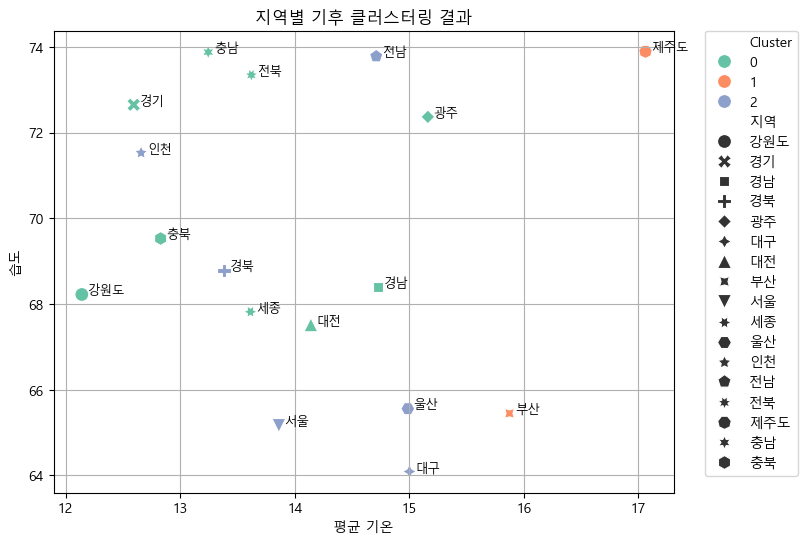

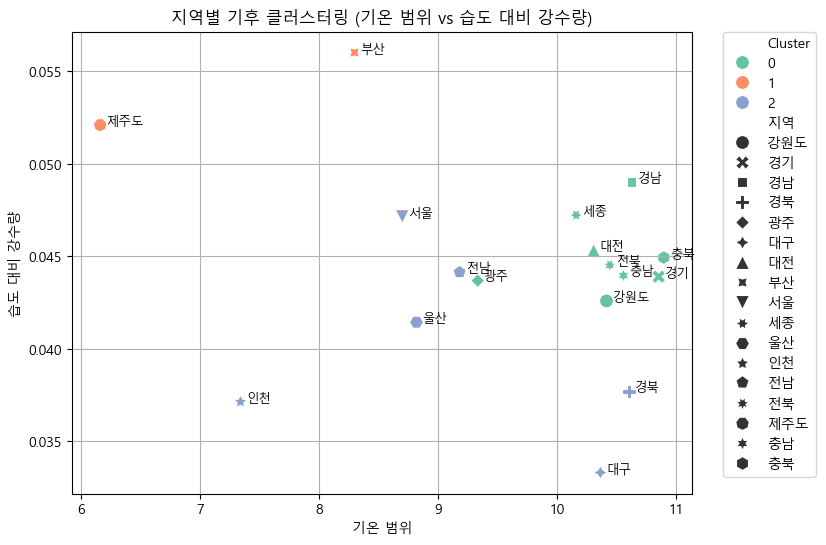

In [74]:
# 1. 날짜 파싱 및 연도 추출
df['연도'] = pd.to_datetime(df['날짜']).dt.year

# 2. 연도 필터링 (2015~2024)
df_filtered = df[df['연도'].between(2015, 2024)]

# 3. 지역 + 연도별 기후 평균 집계
agg_features = ['평균 기온', '최저 기온', '최고 기온', '강수량', '풍속', '습도', '적설량', '기온 범위', '습도 대비 강수량', '불쾌지수', '건조지수']
grouped = df_filtered.groupby(['지역'])[agg_features].mean().reset_index()

# 4. 정규화 (스케일링)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(grouped[agg_features])

# 4-1. PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_scaled_pca = pca.fit_transform(X_scaled)

# 5. 군집 모델 학습 (K=3 가정)
kmeans = KMeans(n_clusters=3, random_state=42)
grouped['Cluster'] = kmeans.fit_predict(X_scaled_pca)

# 6. 시각화 (예: 평균 기온 vs 습도)
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=grouped,
    x='평균 기온', 
    y='습도',
    hue='Cluster', 
    style='지역',
    palette='Set2',
    s=100
)

# 각 점에 지역 이름 붙이기
for i in range(len(grouped)):
    plt.text(
        grouped['평균 기온'][i] + 0.05,  # 약간 오른쪽으로
        grouped['습도'][i], 
        grouped['지역'][i], 
        fontsize=9
    )
    
plt.title("지역별 기후 클러스터링 결과")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

# 7-2. 시각화 ② 기온 범위 vs 습도 대비 강수량
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=grouped,
    x='기온 범위',
    y='습도 대비 강수량',
    hue='Cluster',
    style='지역',
    palette='Set2',
    s=100
)

for i in range(len(grouped)):
    plt.text(
        grouped['기온 범위'][i] + 0.05,
        grouped['습도 대비 강수량'][i],
        grouped['지역'][i],
        fontsize=9
    )

plt.title("지역별 기후 클러스터링 (기온 범위 vs 습도 대비 강수량)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

In [75]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled_pca, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.37


K=2 → Silhouette Score = 0.5215
K=3 → Silhouette Score = 0.3742
K=4 → Silhouette Score = 0.3611
K=5 → Silhouette Score = 0.2596
K=6 → Silhouette Score = 0.2098
K=7 → Silhouette Score = 0.2793
K=8 → Silhouette Score = 0.2396
K=9 → Silhouette Score = 0.2386
K=10 → Silhouette Score = 0.2095


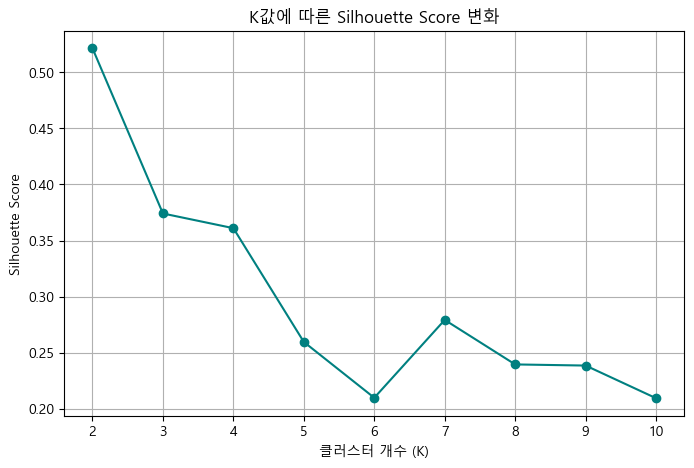

In [76]:
# k값 후보 범위
k_range = range(2, 11)

silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled_pca)
    score = silhouette_score(X_scaled_pca, labels)
    silhouette_scores.append(score)
    print(f'K={k} → Silhouette Score = {score:.4f}')


# 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='teal')
plt.xticks(k_range)
plt.xlabel('클러스터 개수 (K)')
plt.ylabel('Silhouette Score')
plt.title('K값에 따른 Silhouette Score 변화')
plt.grid(True)
plt.show()

##### 군집 기반 지역 분류 (평균 기온 vs 습도)
KMeans 알고리즘으로 자동 분류된 기후 패턴이 유사한 지역들끼리 같은 색으로 표시
- 해석 예시
    - Cluster 0 (초록색): 평균 기온도, 습도도 중간 정도의 지역들 → 기후적으로 가장 "평범한" 지역들
    - Cluster 1 (주황색): 기온은 낮고, 습도는 높다 → 상대적으로 서늘하고 습한 지역들
    - Cluster 2 (파란색): 기온은 높고, 습도는 낮거나 평균 → 더운 편이나 건조한 기후를 가진 지역들

▶ 기후 패턴이 유사한 지역들끼리는 비슷한 시계열 패턴을 보일 가능성이 크므로,

1. 군집별로 지역을 묶고
2. 각 군집의 대표 지역 or 전체 평균을 기반으로
3. 시계열 모델 (Prophet, LSTM 등)을 학습해 예측 모델 생성 가능 (미래 기온 예측의 정확도를 높이기 위해 사용 가능)

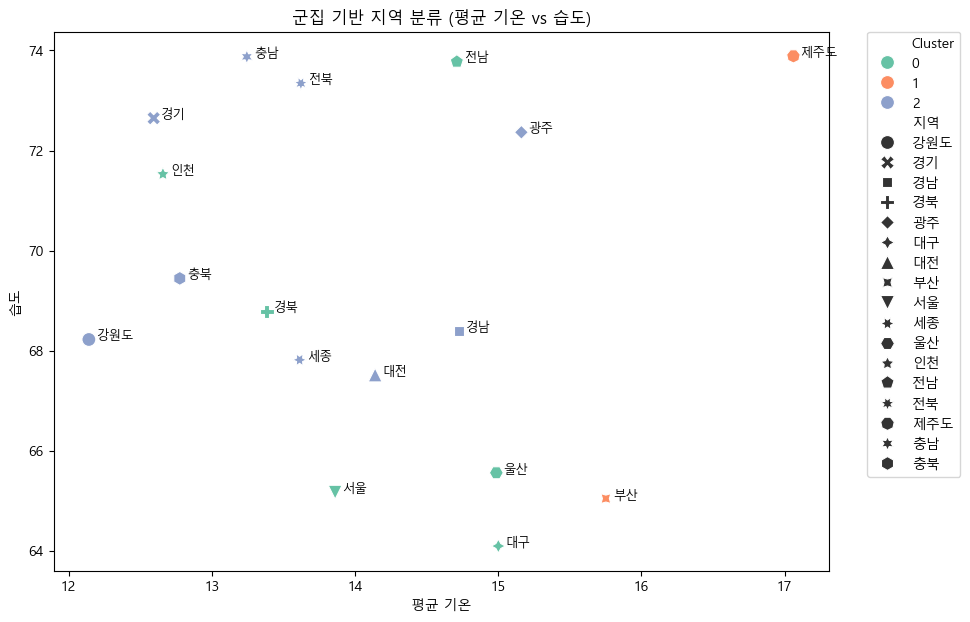

In [77]:
# 1. 연도별, 지역별 평균 기온/습도/풍속 등 집계
grouped = df.groupby(['지역', '연도']).agg({
    '평균 기온': 'mean',
    '습도': 'mean',
    '풍속': 'mean',
    '불쾌지수':'mean',
    '건조지수':'mean'
}).reset_index()

# 2. 최근 연도만 선택 (2020~2024년만 사용)
recent_data = grouped[grouped['연도'] >= 2020]

# 3. 군집 분석을 위한 피처 선택 및 정규화
features = recent_data.groupby('지역')[['평균 기온', '습도', '풍속', '불쾌지수', '건조지수']].mean()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 4. KMeans로 지역 군집화 (예: 3개 군집)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# 5. 군집 결과 붙이기
features['Cluster'] = clusters
features.reset_index(inplace=True)

# 6. 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=features,
    x='평균 기온',
    y='습도',
    hue='Cluster',
    style='지역',
    palette='Set2',
    s=100
)

# 각 점에 지역 이름 붙이기
for i in range(len(features)):
    plt.text(
        features['평균 기온'][i] + 0.05,  # 약간 오른쪽으로
        features['습도'][i], 
        features['지역'][i], 
        fontsize=9
    )
    
plt.title('군집 기반 지역 분류 (평균 기온 vs 습도)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [78]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.32


K=2 → Silhouette Score = 0.4453
K=3 → Silhouette Score = 0.3228
K=4 → Silhouette Score = 0.2507
K=5 → Silhouette Score = 0.2079
K=6 → Silhouette Score = 0.1376
K=7 → Silhouette Score = 0.1446
K=8 → Silhouette Score = 0.2252
K=9 → Silhouette Score = 0.2700
K=10 → Silhouette Score = 0.2286


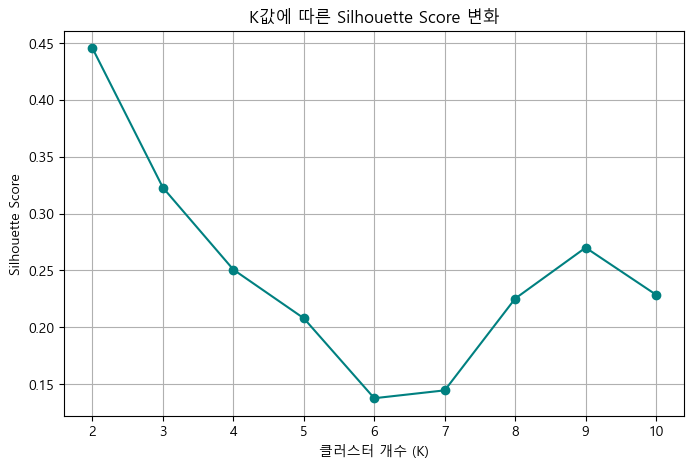

In [79]:
k_range = range(2, 11)  # K=2부터 10까지

silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)
    print(f'K={k} → Silhouette Score = {score:.4f}')

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='teal')
plt.xticks(k_range)
plt.xlabel('클러스터 개수 (K)')
plt.ylabel('Silhouette Score')
plt.title('K값에 따른 Silhouette Score 변화')
plt.grid(True)
plt.show()